Predicted Values

In [5]:
# Requirements
%pip install pandas numpy matplotlib fredapi python-dotenv scipy scikit-learn joblib tdqm

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1400 sha256=d1833df15ca6d829b4f9af5befe8f26c36913b43e72a036beb527bcbaa9f8f90
  Stored in directory: c:\users\josiah lee\appdata\local\pip\cache\wheels\37\31\b8\7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built tdqm

   ---------------------------------------- 2/2 [tdqm]

Note: you may need to restart the kernel to use updated packages.


In [1]:
from src import *

c:\Users\Josiah Lee\Documents\GitHub\dse4212_portfolio_optimisation\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2017-02-08 start test to 2018-02-07
2016-02-09 start test to 2017-02-08

In [2]:
with open('src/processed_data.pkl', 'rb') as f:
    op, high, low, close, volume, returns, risk_free_rate = pickle.load(f)

train_returns = returns.iloc[:-252]
test_returns = returns.iloc[-252:]
test_risk_free_rate = risk_free_rate.iloc[-252:]
cv_returns = train_returns.iloc[-252:]
cv_returns

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-02-09,0.016247,0.017843,0.000353,-0.000211,0.011093,0.013423,-0.012356,-0.018579,-0.014652,0.003047,...,0.001151,-0.003383,-0.013396,-0.003678,-0.032569,0.013438,-0.014339,-0.001414,0.002410,-0.008245
2016-02-10,0.013480,0.025373,-0.020924,-0.007609,-0.014313,0.009980,0.005660,0.009492,0.022494,-0.007123,...,-0.030080,-0.007440,-0.009158,0.012901,0.013606,-0.007657,0.004353,0.010930,-0.001445,-0.013386
2016-02-11,-0.014611,-0.017118,-0.001155,-0.006065,-0.010296,-0.012342,-0.023658,-0.008314,-0.007842,-0.002454,...,-0.015838,0.008075,0.003146,-0.021359,-0.021629,-0.006057,-0.023031,-0.013327,-0.041344,0.000762
2016-02-12,0.024879,0.035800,0.016907,0.003090,0.007637,0.012459,0.021506,0.013502,0.022823,0.016247,...,0.040726,0.008430,0.017805,-0.032006,0.009164,0.022663,0.031682,0.001090,0.053326,0.026822
2016-02-16,0.023466,0.020673,0.036479,0.027804,0.017533,0.000000,0.022898,0.023069,0.028417,0.047792,...,0.002022,0.008984,0.002342,0.017568,0.028108,-0.001080,0.031860,0.019850,0.032344,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,0.005905,-0.004530,-0.022474,0.059194,-0.003607,0.015123,0.013318,-0.005813,-0.000176,0.016280,...,0.009536,-0.014015,-0.011389,0.003521,0.020001,-0.003250,-0.010123,0.001520,0.006379,0.006893
2017-02-02,-0.007335,-0.000908,0.010838,-0.001710,0.000000,-0.006340,0.009873,0.003791,-0.001766,-0.012418,...,0.026280,0.012984,0.006130,-0.006701,0.014045,-0.007147,0.012257,-0.007538,-0.016384,0.006846
2017-02-03,0.009768,0.004308,0.002522,0.004270,-0.003620,0.013873,0.000702,0.007452,0.017607,0.003847,...,-0.007475,0.001375,0.001078,0.010910,-0.002793,0.009179,0.008491,0.004411,0.036205,0.003942


Predicting the returns

In [3]:
predictor = MLReturnPredictor(model_type='ridge', alpha=.1)
X_train, y_train = predictor.create_training_dataset(os.listdir('src/data')[:os.listdir('src/data').index('2017-02-08.pkl')-65],
                                                      train_returns.iloc[:-65]) #65 for purge
predictor.train(X_train, y_train)
predicted = predictor.predict_all_test_returns(os.listdir('src/data')[os.listdir('src/data').index('2017-02-08.pkl'):])

Creating training dataset from 871 files...
✓ Dataset created: X=(409370, 54), y=(409370,)
Training ridge model...
✓ Training R²: 0.0058
  Prediction spread: 0.1243%
Predicting returns for 252 dates...
✓ Predictions complete: (252, 470)


This is during the test period then to do walk forward can use this code

In [40]:
predicted

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2017-02-08,-0.000390,-0.001618,0.000662,-0.001462,0.000373,0.001351,-0.000780,-0.000524,-0.000800,-0.000079,...,-0.001333,-0.000099,-0.000591,0.000310,-0.000764,-0.000208,-0.000356,0.001275,-0.000807,-0.000294
2017-02-09,-0.000197,0.000991,0.000889,-0.000116,-0.000378,-0.000683,0.000027,-0.000461,-0.001655,-0.000867,...,-0.000586,-0.001567,0.000286,-0.000521,-0.000250,-0.000371,-0.001081,0.000637,-0.000071,-0.001163
2017-02-10,-0.000048,-0.000398,0.000755,-0.000778,-0.001503,-0.000424,-0.000549,-0.000705,-0.001107,-0.000671,...,-0.000396,-0.001382,-0.000049,-0.001909,-0.000945,-0.000486,-0.000742,0.000067,-0.000754,-0.000485
2017-02-13,-0.001695,-0.000573,0.000626,-0.000466,-0.000805,-0.001178,-0.001170,-0.000369,-0.000501,0.000039,...,-0.000790,0.000013,-0.000150,-0.001154,-0.000363,-0.000361,-0.000425,-0.001475,0.000208,-0.000213
2017-02-14,-0.001262,-0.001309,0.000133,-0.001998,-0.000188,-0.000385,-0.001146,-0.000791,-0.001396,-0.001711,...,-0.001264,-0.000505,0.000214,-0.000594,-0.002279,-0.001509,-0.000679,-0.001039,-0.001539,-0.000193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,0.000385,-0.001943,0.001398,0.000309,-0.001634,0.001516,0.000157,-0.000335,-0.000451,0.000243,...,-0.001900,0.000248,0.000593,0.000820,-0.001524,-0.000580,-0.000385,0.000241,-0.001452,0.000342
2018-02-02,-0.000035,-0.002433,0.000784,-0.000214,-0.001086,-0.000406,-0.000359,-0.000107,-0.000836,-0.001709,...,-0.000971,-0.001281,-0.000613,-0.000189,-0.001534,-0.000577,-0.000137,-0.001712,-0.001081,-0.000084
2018-02-05,0.000347,-0.001034,0.001992,0.000223,0.001706,0.001207,0.000791,0.000508,-0.000513,-0.000836,...,-0.001235,0.000350,-0.000134,-0.000318,0.000524,-0.000506,0.000358,0.000048,0.000556,0.000505
2018-02-06,0.001290,0.002724,0.002789,0.002234,0.001110,0.002456,0.000470,0.001558,0.001642,0.000649,...,0.000335,0.001978,0.001291,0.002035,0.002459,0.000763,0.002119,0.000938,0.001330,0.001569


In [3]:
# testing_dates = test_returns.index.strftime('%Y-%m-%d').map(lambda x: x+".pkl").values

with open('src/data_weekly_var/weekly_volatility_targets.pkl', 'rb') as f:
    weekly_volatility_targets = pickle.load(f)

test_weekly_var = weekly_volatility_targets.loc['2017-02-08':]

testing_dates = test_weekly_var.index.strftime('%Y-%m-%d').map(lambda x: x+".pkl").values

preds = []

for test_date in testing_dates:
    predictor = MLReturnPredictor(model_type='ridge', alpha=.1)
    X_train, y_train = predictor.create_training_dataset(os.listdir('src/data_weekly_var')[:os.listdir('src/data_weekly_var').index(test_date)-10],
                                                        np.log(weekly_volatility_targets)) #65 for purge
    predictor.train(X_train, y_train)
    predicted = predictor.predict_all_test_returns([test_date])
    preds.append(predicted)

predicted = pd.concat(preds)
predicted = np.exp(predicted)


Creating training dataset from 166 files...
✓ Dataset created: X=(78020, 54), y=(78020,)
Training ridge model...
✓ Training R²: 0.2754
  Prediction spread: 58.7913%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 167 files...
✓ Dataset created: X=(78490, 54), y=(78490,)
Training ridge model...
✓ Training R²: 0.2751
  Prediction spread: 58.7490%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 168 files...
✓ Dataset created: X=(78960, 54), y=(78960,)
Training ridge model...
✓ Training R²: 0.2742
  Prediction spread: 58.6275%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 169 files...
✓ Dataset created: X=(79430, 54), y=(79430,)
Training ridge model...
✓ Training R²: 0.2736
  Prediction spread: 58.5480%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 170 files...
✓ Dataset created: X=(79900,

Generate weights for variance

In [4]:
tickers = predicted.columns.tolist()

def compute_weights_for_date(date):
    opt = PortfolioOptimizer(returns.loc[:date].iloc[:-1]).minimum_variance_from_cov(predicted.loc[[date]], max_position=0.05)
    return pd.Series(opt, index=tickers)

weights_list = Parallel(n_jobs=-1)(
    delayed(compute_weights_for_date)(d) for d in tqdm(predicted.index, desc="weights")
)

weights = pd.concat(weights_list, axis=1).T
weights.index.name = 'date'
weights.index = predicted.index

with open('weights_variance.pkl', 'wb') as f:
    pickle.dump(weights, f)

weights: 100%|██████████| 46/46 [04:57<00:00,  6.47s/it]


The one below takes very long btw

Chooses optimal portfolio based on predicted returns

In [ ]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm
import pickle

tickers = predicted.columns.tolist()

def compute_weights_for_date(date):
    predicted_returns = pd.concat([returns.loc[:date].iloc[:-1], predicted.loc[[date]]])
    opt = PortfolioOptimizer(predicted_returns).minimum_variance(max_position=0.05)
    return pd.Series(opt, index=tickers)

weights_list = Parallel(n_jobs=-1)(
    delayed(compute_weights_for_date)(d) for d in tqdm(predicted.index[:5], desc="weights")
)

weights = pd.concat(weights_list, axis=1).T
weights.index.name = 'date'
weights.index = predicted.index[:5]

with open('weights.pkl', 'wb') as f:
    pickle.dump(weights, f)


weights: 100%|██████████| 5/5 [00:00<00:00, 3983.19it/s]


In [30]:
returns.head(5).sum(axis=0)

Name
A      -0.064834
AAL    -0.017094
AAP     0.001267
AAPL   -0.031698
ABBV    0.036033
          ...   
XYL     0.042990
YUM    -0.020265
ZBH     0.000659
ZION    0.008251
ZTS     0.027751
Length: 470, dtype: float64

In [27]:
date_idx = returns.index.get_loc("2018-02-07")
window_start = date_idx - 70
window_end = date_idx
returns_window = returns.iloc[window_start:window_end]
returns_window

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-10-26,0.004737,-0.048388,0.027941,0.006373,-0.024486,-0.042988,-0.000360,0.005297,0.011112,0.007760,...,-0.015546,-0.001273,0.003300,0.006047,-0.076598,0.004407,0.015809,-0.004124,0.020233,-0.009991
2017-10-27,0.003833,-0.021837,-0.044404,0.035203,0.026119,-0.030811,-0.001985,0.009185,0.020395,0.007152,...,-0.001225,0.029711,0.002871,-0.000326,-0.005562,0.000771,-0.008338,0.028194,0.003828,0.004852
2017-10-30,-0.007087,-0.006539,0.000854,0.022259,-0.010608,0.007175,-0.019698,0.000070,-0.007358,0.001205,...,0.011211,0.003978,-0.002033,-0.001142,-0.008236,-0.003398,-0.003728,-0.025305,-0.006602,-0.012727
2017-10-31,0.007969,-0.009142,-0.003176,0.013820,-0.007836,0.000260,-0.001106,-0.006511,-0.004955,-0.000219,...,-0.019333,0.008723,-0.002277,-0.003433,0.002643,0.028820,-0.006827,0.002222,-0.007291,0.009130
2017-11-01,-0.000147,0.021552,-0.012186,-0.012800,0.023976,-0.004298,-0.004250,0.004206,0.006204,-0.003401,...,-0.003217,-0.008860,0.006219,0.001473,-0.000660,-0.005728,-0.001882,-0.055187,-0.005179,0.010754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31,0.006010,0.032366,-0.019301,0.002751,-0.032094,-0.027608,-0.004494,0.006242,0.014421,0.003598,...,0.005990,0.012263,0.005974,-0.009656,0.043413,-0.011147,0.000000,0.009326,0.001853,-0.020893
2018-02-01,-0.008205,-0.008133,0.002561,0.002088,0.036056,-0.003820,0.000322,-0.001495,-0.001904,-0.002506,...,-0.001358,-0.007285,0.020072,-0.001316,-0.041274,0.035082,-0.007237,0.008382,0.017430,0.014106
2018-02-02,-0.021933,-0.033594,-0.029065,-0.044360,-0.010108,-0.033488,-0.007912,-0.022436,-0.018936,-0.028105,...,0.038917,-0.025852,-0.052316,-0.011094,-0.034797,0.010897,-0.016206,-0.018900,-0.015212,-0.013454


In [10]:
spy_weights = volume.shift(1)
close_prices = close.shift(1)
spy_weights = spy_weights.loc["2017-02-08":"2018-02-07"]
close_prices = close_prices.loc["2017-02-08":"2018-02-07"]
spy_weights = spy_weights*close_prices
spy_weights = spy_weights.div(spy_weights.sum(axis=1), axis=0)
spy_weights.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-02-08,0.000904,0.002320,0.001591,0.042149,0.002140,0.001598,0.003131,0.002469,0.001586,0.001368,...,0.000647,0.000593,0.008131,0.000733,0.000665,0.000730,0.000835,0.000793,0.000626,0.001129
2017-02-09,0.000890,0.001652,0.002647,0.025709,0.002745,0.001133,0.002416,0.002319,0.002547,0.002228,...,0.000412,0.000669,0.009659,0.000637,0.001103,0.000640,0.001397,0.001002,0.000624,0.001368
2017-02-10,0.001079,0.002744,0.001518,0.031384,0.002200,0.001249,0.001827,0.002070,0.001644,0.001402,...,0.000475,0.000727,0.006570,0.001099,0.000517,0.000639,0.001682,0.000985,0.000725,0.001242
2017-02-13,0.000915,0.001629,0.001047,0.023014,0.003016,0.001209,0.001370,0.002229,0.002650,0.001109,...,0.000414,0.002540,0.006261,0.000606,0.000451,0.000586,0.001883,0.000795,0.000930,0.002981
2017-02-14,0.000707,0.002607,0.001430,0.027412,0.003455,0.002454,0.002189,0.002105,0.002007,0.001835,...,0.000488,0.002052,0.006722,0.000706,0.000692,0.000692,0.002680,0.000694,0.000865,0.002775


Preparing backtest


In [12]:
backtester = WalkForwardBacktest(
    train_returns=train_returns,
    test_returns=test_returns,
    # test_prices=test_prices,
    rf_rate_test=test_risk_free_rate,
    rebalance_freq='D'  # Weekly
)

running backtest

In [23]:
results = {}

with open('weights.pkl', 'rb') as f:
    weights = pickle.load(f)

# Run Equal Weight
results['ML w fees'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=10
)

results['ML no fees'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=0
)


weights = weights.iloc[[0]]

for col in weights.columns:
    weights[col].values[:] = 1/470

results['Base - Buy & Hold'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=0
)

results['SPY'] = backtester.run_backtest_preloaded_weights(
    strategy_name='SPY',
    preloaded_weights=spy_weights,
    transaction_cost_bps=0
)

with open('weights_variance.pkl', 'rb') as f:
    weights_var = pickle.load(f)

results['vol'] = backtester.run_backtest_preloaded_weights(
    strategy_name='Volatility',
    preloaded_weights=weights_var,
    transaction_cost_bps=0
)


Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.0946

Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.1106

Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (1, 470)
Backtest complete. Final value: $1.1142

Running backtest: SPY
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.1348

Running backtest: Volatility
Rebalancing frequency: D
Preloaded weights shape: (46, 470)
Backtest complete. Final value: $1.0997


Evaluation


Performance Comparison:
                  Total Return Annualized Return Annualized Volatility Sharpe Ratio Sortino Ratio Maximum Drawdown Calmar Ratio Win Rate Avg Turnover per Rebalance Total Turnover
ML w fees                9.46%             9.46%                 6.91%        1.126         0.965           -6.68%        1.416   57.77%                      5.80%          14.56
ML no fees              11.06%            11.06%                 6.91%        1.337         1.149           -6.65%        1.664   58.17%                      5.80%          14.56
Base - Buy & Hold       11.42%            11.42%                 8.55%        1.162         1.033           -7.80%        1.464   55.78%                      0.00%           0.00
SPY                     13.48%            13.48%                 9.28%        1.281         1.166           -7.71%        1.748   54.18%                     28.21%          70.81
vol                      9.97%             9.97%                 6.91%        1.

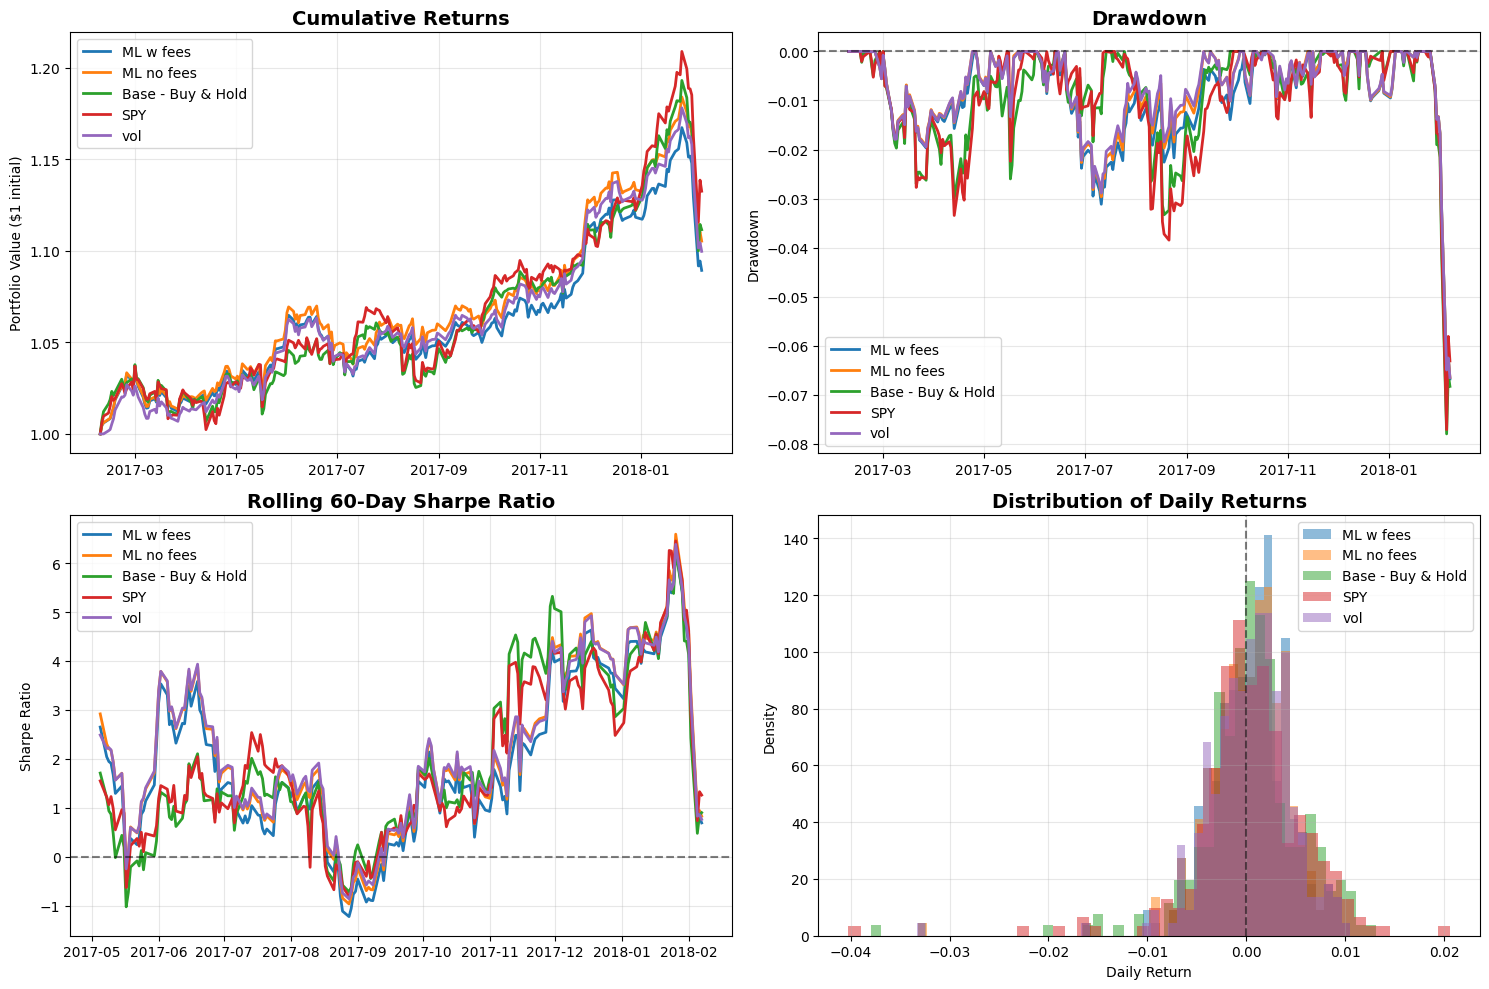

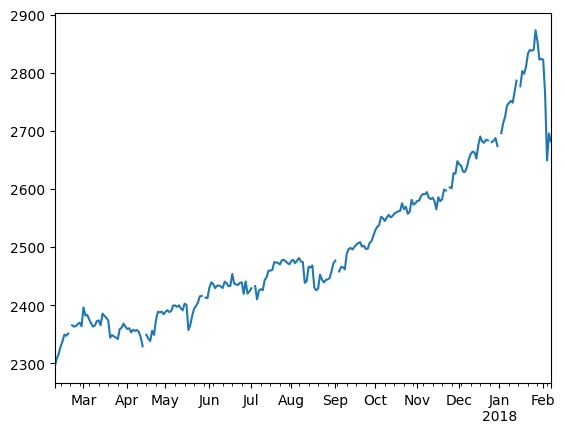

In [24]:
evaluator = PerformanceEvaluator(test_risk_free_rate)

comparison_df = evaluator.compare_strategies(results)
print("\nPerformance Comparison:")
print(comparison_df.to_string())

# ============================================================
# STEP 5: Visualize Results
# ============================================================
print("\n5. Generating Visualizations")
print("-" * 60)

fig = evaluator.plot_results(results, figsize=(15, 10))
plt.show()

fred = Fred(api_key = os.getenv("API_KEY"))
spy = fred.get_series_latest_release('SP500').loc["2017-02-08":"2018-02-07"]
spy.plot()
plt.show()
